# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN

### 1.1 Generating dataset

In [46]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [73]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [75]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [148]:
no_training_epochs = 5

### 1.3 Data examination

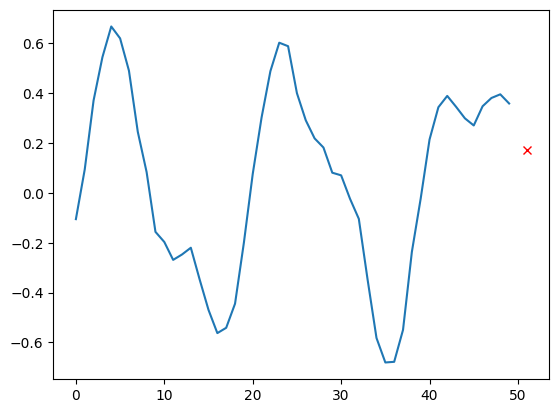

In [76]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [157]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [158]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [159]:
model_linear.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 1s 3ms/step - loss: 0.1716 - mean_squared_error: 0.1716 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 5/5
219/219 [==============================] - 1s 5ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


In [161]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

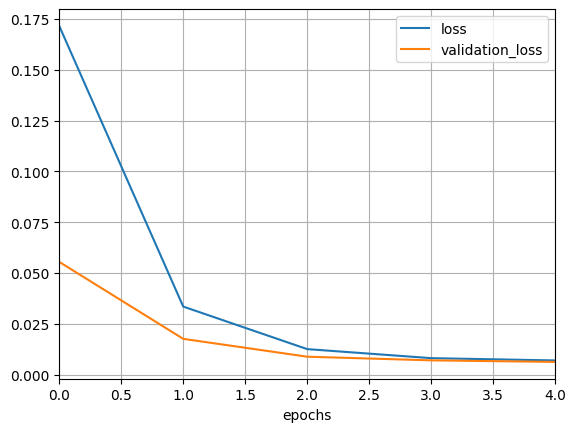

In [162]:
plot_function(history_linear)

In [165]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.00653478316962719
Test MSE:  0.00653478316962719


### 1.5 Simple RNN Model

In [166]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [167]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [168]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 12s 47ms/step - loss: 0.1772 - mean_squared_error: 0.1772 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 2/5
219/219 [==============================] - 10s 45ms/step - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.0889 - val_mean_squared_error: 0.0889
Epoch 3/5
219/219 [==============================] - 12s 55ms/step - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.0699 - val_mean_squared_error: 0.0699
Epoch 4/5
219/219 [==============================] - 10s 45ms/step - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0570 - val_mean_squared_error: 0.0570
Epoch 5/5
219/219 [==============================] - 7s 30ms/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0480 - val_mean_squared_error: 0.0480


In [ ]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [169]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [170]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [171]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 33s 136ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2/5
219/219 [==============================] - 27s 126ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 3/5
219/219 [==============================] - 36s 165ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 4/5
219/219 [==============================] - 34s 154ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/5
219/219 [==============================] - 28s 126ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


In [172]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0033847796730697155
Test MSE:  0.0033847796730697155


In [ ]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [285]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [286]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [287]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [288]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [289]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [305]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [315]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [316]:
optimizer = Adam(learning_rate = 0.001)

In [317]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [318]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 163s 256ms/step - loss: 0.6991 - accuracy: 0.4995 - val_loss: 0.6944 - val_accuracy: 0.4938
Epoch 2/5
625/625 [==============================] - 137s 220ms/step - loss: 0.6954 - accuracy: 0.5016 - val_loss: 0.6949 - val_accuracy: 0.4938
Epoch 3/5
625/625 [==============================] - 136s 218ms/step - loss: 0.6960 - accuracy: 0.4953 - val_loss: 0.6941 - val_accuracy: 0.4938
Epoch 4/5
625/625 [==============================] - 133s 212ms/step - loss: 0.6959 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 5/5
625/625 [==============================] - 132s 211ms/step - loss: 0.6966 - accuracy: 0.5057 - val_loss: 0.6943 - val_accuracy: 0.5062


In [319]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6951086521148682
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results